In [2]:
#240329

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/titanic2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Titanic 데이터를 대상으로 모델링을 진행합니다.
- kNN 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [5]:
# 상/하위 몇 개 행 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 하위 몇 개 행 확인
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 기술통계 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 상관관계 확인
data.corr() # numeric_only=True

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 변수 추가**
- Name 열에서 호칭을 추출해 Title 만듬
- 일반적인 호칭을 제외하고 나머지는 Other로 변경

In [10]:
# Title 열 추가

In [14]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [18]:
data['Title']=data['Name'].str.extract('([a-zA-Z]+)\.') 
# 알파벳 // +:하나이상 // \.: 점 나온다 // () 여기그룹만 출력 #★

data.loc[ data['Title']. isin(['Mr','Miss','Mrs','Master'])==False, 'Title' ] = 'Others' #★
data['Title'].value_counts()

# 이걸넣고 sex열 삭제 검토

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [19]:
# 제거 대상: PassengerId, Name, Ticket, Cabin
data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 확인
data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,22.0,1,0,7.2500,S,Mr
1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,26.0,0,0,7.9250,S,Miss


**3) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [20]:
data.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [27]:
# Age 결측치를 Title별 중앙값으로 채우기
age_median = data.groupby(by='Title')['Age'].transform('median') # 
data['Age'].fillna(age_median, inplace=True)
data.isna().sum()


# 아래도 가능
# data['Age'].fillna( data['Age'].mean(), inplace=True) 

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [28]:
# Embarked 최빈값 'S'로 채우기
data['Embarked'].fillna( data['Embarked'].mode()[0], inplace=True) 

In [29]:
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

**4) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [30]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**5) 가변수화**

- 범주형 변수를 가변수화 합니다.

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [33]:
# 가변수화 대상: Pclass, Title, Embarked
# 가변수화
x = pd.get_dummies(x, columns=['Pclass', 'Title', 'Embarked'], drop_first=True, dtype=int)

# data 아님 #★

#  확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,1,0,0,0,1
1,38.0,1,0,71.2833,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,1,1,0,0,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1,0,0,1
4,35.0,0,0,8.0500,0,1,0,1,0,0,0,1


**6) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [34]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘을 사용합니다.
    - 알고리즘: KNeighborsClassifier

In [35]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# 2단계: 선언하기
model=KNeighborsClassifier()

In [37]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5.분류 성능 평가

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [39]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(confusion_matrix(y_test, y_pred))

[[124  29]
 [ 49  66]]


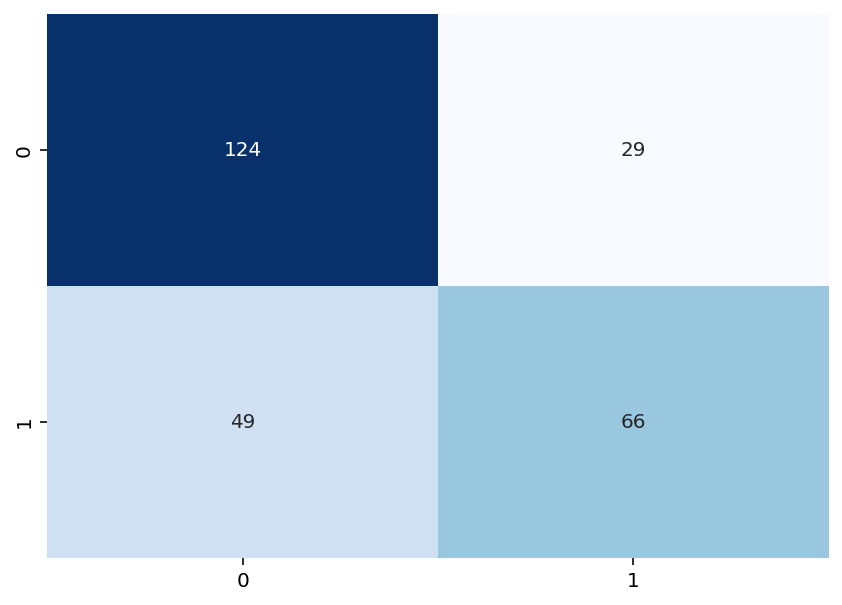

In [40]:
# 혼동행렬 시각화
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot=True,
           cbar=False,
           cmap='Blues',
           fmt='d') # 정수 #★
plt.show()

**2) Accuracy**

In [41]:
# 모듈 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
print('accuracy_score : ', accuracy_score(y_test, y_pred))

accuracy_score :  0.7089552238805971


**3) Precision**

In [42]:
# 모듈 불러오기
from sklearn.metrics import precision_score

# 성능 평가
print('precision_score : ', precision_score(y_test, y_pred)) 
# print('precision_score : ', precision_score(y_test, y_pred), average=None) # 출력 버전오류

precision_score :  0.6947368421052632


**4) Recall**

In [43]:
# 모듈 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print('recall_score : ', recall_score(y_test, y_pred))

recall_score :  0.5739130434782609


**5) F1-Score**

In [44]:
# 모듈 불러오기
from sklearn.metrics import f1_score

# 성능 평가
print('f1_score : ', f1_score(y_test, y_pred))

f1_score :  0.6285714285714286


**6) Classification Report**

In [45]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print('classification_report : ', classification_report(y_test, y_pred), sep='\n') #★

classification_report : 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       153
           1       0.69      0.57      0.63       115

    accuracy                           0.71       268
   macro avg       0.71      0.69      0.69       268
weighted avg       0.71      0.71      0.70       268

